# Skin cancer segmentation and classification

https://www.kaggle.com/surajghuwalewala/ham1000-segmentation-and-classification

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from PIL import Image


data_fp = os.path.join(os.path.expanduser("~"), ".MIDS_data", "skin_cancer")
ground_truth_fp = os.path.join(data_fp, "GroundTruth.csv")
ground_truth = pd.read_csv(ground_truth_fp, encoding="utf-8")

print(f"Ground Truth: {ground_truth.shape}")

ground_truth.head()

Ground Truth: (10015, 8)


,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0024306,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0024307,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0024308,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0024309,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0024310,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
image_dir = os.path.join(data_fp, "images")
filetypes = {f.split(".")[-1] for f in os.listdir(image_dir)}
filetypes

{'DS_Store', 'jpg', 'txt'}

In [3]:
jpgs = [f for f in os.listdir(image_dir) if f.endswith(".jpg")]
len(jpgs)

10015

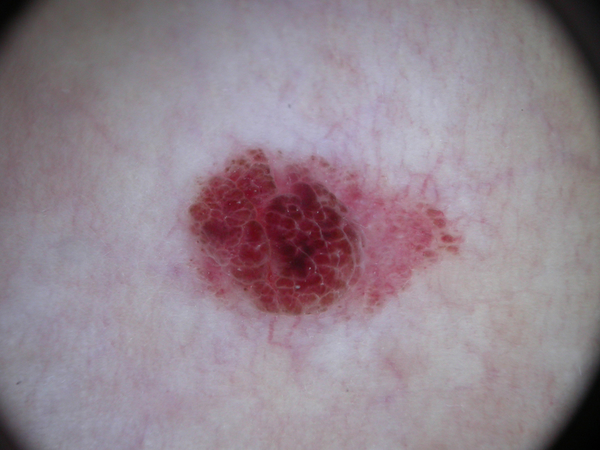

In [4]:
img_name = jpgs[2]
example = Image.open(os.path.join(data_fp, "images", img_name), "r")
example

In [5]:
example.size

(600, 450)

# Convert to greyscale
From: https://e2eml.school/convert_rgb_to_grayscale.html

In [6]:
color_img = np.asarray(example)/ 255
color_img.shape

(450, 600, 3)

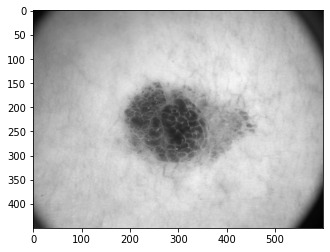

In [7]:
grey = (color_img[:, :, 0] * 0.299) + (color_img[:, :, 1] * 0.587) + (color_img[:, :, 1] * 0.114)
plt.imshow(grey, cmap="gist_gray")

## Save greyscale values to CSV

In [8]:
csv_dir = os.path.join(data_fp, "csv")
if not os.path.exists(csv_dir):
    os.mkdir(csv_dir)

In [9]:
def save_grayscale(image_name: str):
    fp = os.path.join(image_dir, image_name)
    example = Image.open(fp, "r")
    color_img = np.asarray(example)/ 255
    grey = (color_img[:, :, 0] * 0.299) + (color_img[:, :, 1] * 0.587) + (color_img[:, :, 1] * 0.114)
    pixel_values = grey.flatten()
    df = pd.DataFrame({"pixel": range(len(pixel_values)), "value": pixel_values})

    # Save to CSV:
    filename = image_name.split(".")[0]
    csv_fp = os.path.join(csv_dir, f"{filename}.csv")
    df.to_csv(csv_fp, encoding="utf-8", index=False)
    return df


save_grayscale(img_name)

,pixel,value
0,0,0.016455
1,1,0.015686
2,2,0.015686
3,3,0.018031
4,4,0.018031
...,...,...
269995,269995,0.003922
269996,269996,0.003922
269997,269997,0.000000
269998,269998,0.000000
